In [2]:
import spacy
nlp = spacy.load('en_core_web_md')
doc = nlp("I ate a banana.")
doc[3].vector

array([ 2.0228e-01, -7.6618e-02,  3.7032e-01,  3.2845e-02, -4.1957e-01,
        7.2069e-02, -3.7476e-01,  5.7460e-02, -1.2401e-02,  5.2949e-01,
       -5.2380e-01, -1.9771e-01, -3.4147e-01,  5.3317e-01, -2.5331e-02,
        1.7380e-01,  1.6772e-01,  8.3984e-01,  5.5107e-02,  1.0547e-01,
        3.7872e-01,  2.4275e-01,  1.4745e-02,  5.5951e-01,  1.2521e-01,
       -6.7596e-01,  3.5842e-01, -4.0028e-02,  9.5949e-02, -5.0690e-01,
       -8.5318e-02,  1.7980e-01,  3.3867e-01,  1.3230e-01,  3.1021e-01,
        2.1878e-01,  1.6853e-01,  1.9874e-01, -5.7385e-01, -1.0649e-01,
        2.6669e-01,  1.2838e-01, -1.2803e-01, -1.3284e-01,  1.2657e-01,
        8.6723e-01,  9.6721e-02,  4.8306e-01,  2.1271e-01, -5.4990e-02,
       -8.2425e-02,  2.2408e-01,  2.3975e-01, -6.2260e-02,  6.2194e-01,
       -5.9900e-01,  4.3201e-01,  2.8143e-01,  3.3842e-02, -4.8815e-01,
       -2.1359e-01,  2.7401e-01,  2.4095e-01,  4.5950e-01, -1.8605e-01,
       -1.0497e+00, -9.7305e-02, -1.8908e-01, -7.0929e-01,  4.01

In [4]:
type(doc[3].vector)

numpy.ndarray

In [5]:
doc = nlp("I like an apple.")
doc.vector
doc[1:3].vector

array([-9.79159996e-02,  1.24972500e-01, -1.40338004e-01,  1.68995023e-01,
        2.57180005e-01,  2.28805006e-01, -8.91599953e-02, -1.90514997e-01,
       -1.06068999e-01,  2.30815005e+00, -1.65383011e-01,  1.57840010e-02,
        1.81295007e-01, -1.68266501e-02, -9.91649926e-02, -1.19519003e-01,
       -2.56225020e-02,  1.14383996e+00, -3.89995009e-01, -2.35033497e-01,
       -5.35520017e-02, -8.26099962e-02, -2.02414989e-01,  9.93564501e-02,
       -3.86699960e-02, -8.47284943e-02, -7.96869993e-02, -9.84494984e-02,
        2.31244504e-01, -2.64310002e-01,  1.39731497e-01,  3.20980012e-01,
       -9.20934975e-02,  1.85279995e-01,  1.95924997e-01, -3.60790014e-01,
        1.79429986e-02, -1.79874986e-01, -1.95649937e-02, -2.29257494e-01,
        1.07875004e-01,  2.20300004e-01, -1.94135010e-01, -3.16396147e-01,
        3.01454999e-02, -3.96259986e-02, -2.50660509e-01, -1.67946994e-01,
        5.40609993e-02,  1.44195497e-01, -2.29320005e-01,  7.35090077e-02,
       -9.44869965e-02,  

In [7]:
doc = nlp("You went there afskfsd.")
for token in doc:
    print(token.is_oov, token.has_vector)

False True
False True
False True
True False
False True


In [ ]:
 The similarity method

In [8]:
doc1 = nlp("I visited England.")
doc2 = nlp("I went to London.")
doc1[1:3].similarity(doc2[1:4])

0.6539691

In [9]:
doc1[2].similarity(doc2[3])

0.73891276

In [10]:
doc1.similarity(doc2)

0.8771558796234277

In [11]:
doc1.similarity(doc1)

1.0

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import spacy

nlp = spacy.load("en_core_web_md")
vocab = nlp("cat dog tiger elephant bird monkey lion cheetah burger pizza food cheese wine salad noodles macaroni fruit vegetable")
words = [word.text for word in vocab]

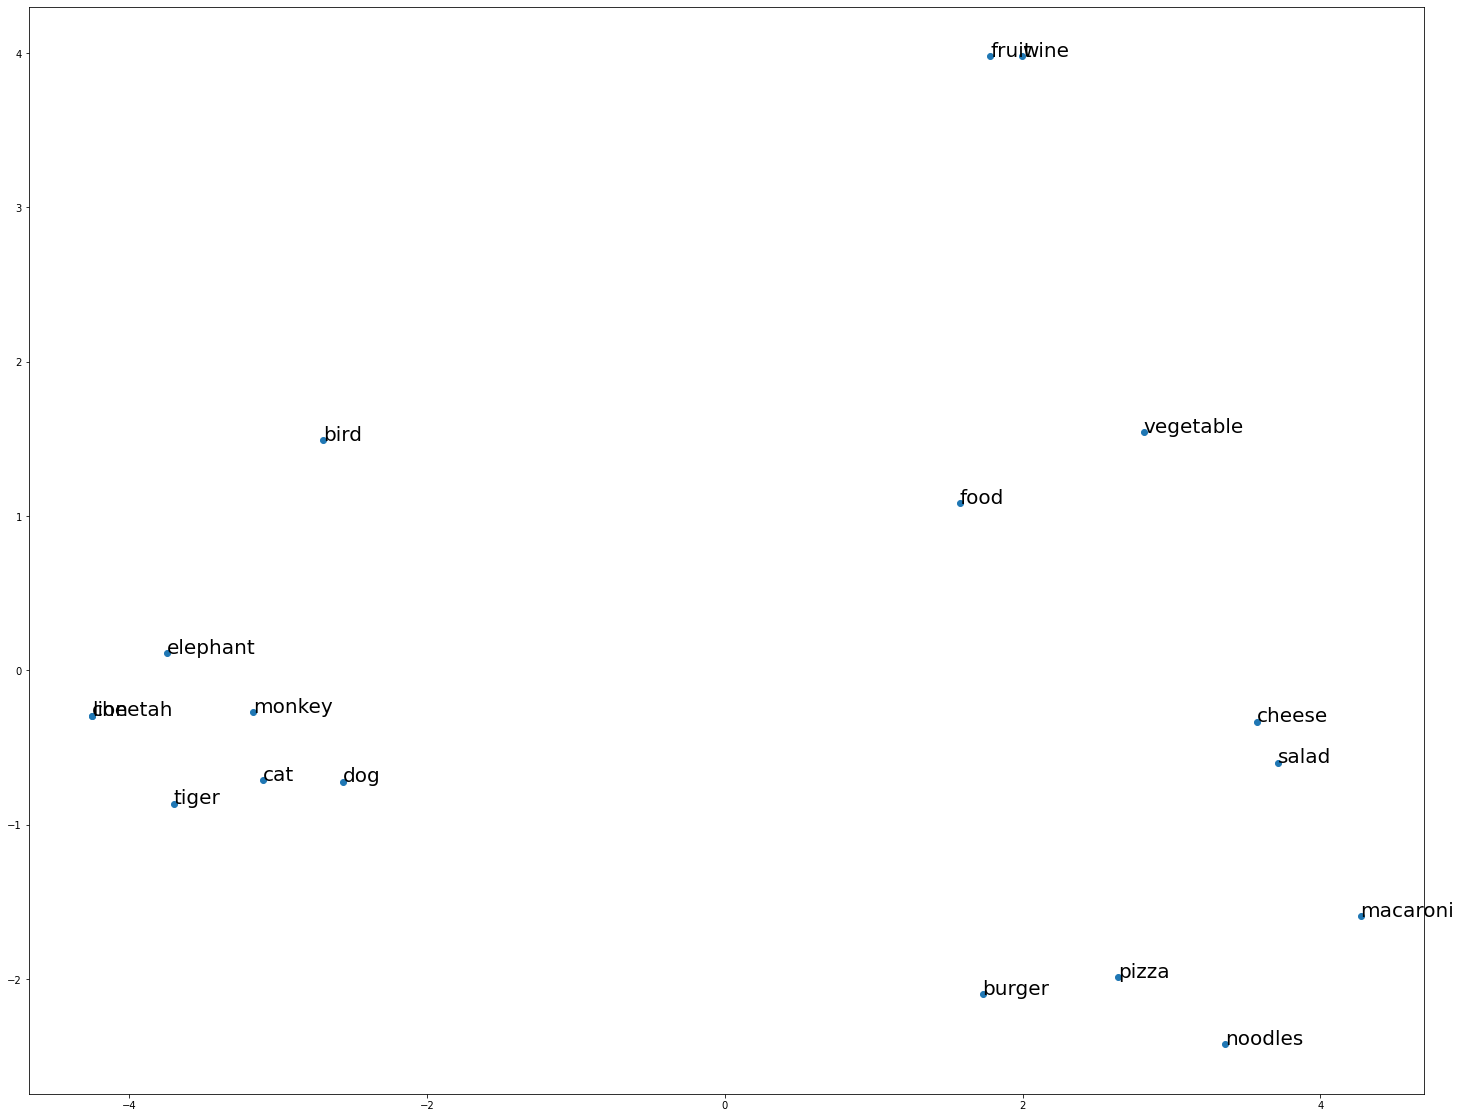

In [2]:
vecs = np.vstack([word.vector for word in vocab if word.has_vector])
pca = PCA(n_components=2)

vecs_transform = pca.fit_transform(vecs)
plt.figure(figsize=(25, 20))
plt.scatter(vecs_transform[:, 0], vecs_transform[:, 1])

for word, coord in zip(words, vecs_transform):
    x,y = coord
    plt.text(x, y, word, size=20)
plt.show()

 Extracting key phrase

In [3]:
#extract noun phrase
doc = nlp("My beautiful and cute dog jumped over the fence.")
doc.noun_chunks

In [4]:
list(doc.noun_chunks)

[My beautiful and cute dog, the fence]

In [5]:
sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine. ")
key = nlp("perfume")
for sent in sentences.sents:
    print(sent.similarity(key))

0.2481654331382154
0.5075297559861377
0.4215429463030136


In [7]:
#extract key phrase from perfume

for sent in sentences.sents:
    nchunks = [nchunk.text for nchunk in sent.noun_chunks]
    nchunk_doc = nlp(" ".join(nchunks))
    print(nchunk_doc.similarity(key))

0.21390893517254456
0.6370830556977022
0.44506391511570403


 Extracting and comparing named entities

In [10]:
doc1 = nlp("Google Search, often referred as Google, is the most popular search engine nowadays. It answers a huge volume of queries everyday.")
doc2 = nlp("Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world.")
doc3 = nlp("The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world.")

doc1.ents


(Google Search, Google)

In [11]:
doc2.ents

(Microsoft Bing, Microsoft, Microsoft, Windows)

In [12]:
doc3.ents

(The Dead Sea, the Jordan Valley, Israel)

In [13]:
#extract words to compare and calc similarity
ents1 = [ent.text for ent in doc1.ents]
ents2 = [ent.text for ent in doc2.ents]
ents3 = [ent.text for ent in doc3.ents]

ents1 = nlp(" ".join(ents1))
ents2 = nlp(" ".join(ents2))
ents3 = nlp(" ".join(ents3))

ents1.similarity(ents2)

0.5888884615666552

In [14]:
ents2.similarity(ents3)

0.36244710903224026